In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from google.colab import files
from google.colab.patches import cv2_imshow


import pandas as pd
import numpy
import cv2
import os
import glob

In [14]:
uploaded = files.upload()

Saving case1.jpg to case1.jpg
Saving case2.jpg to case2.jpg
Saving case3.jpg to case3.jpg
Saving case4.jpg to case4.jpg


In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
cd /content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P4_SVM/New Data

/content/gdrive/MyDrive/Machine_Learning/Colab Notebooks/ML_Practicals/1_Practical/P4_SVM/New Data


In [17]:
ls

case1.jpg  case2.jpg  case3.jpg  case4.jpg  Data/  labels.npy  matrix.npy


In [18]:
imagematrix = numpy.load("matrix.npy")
imagelabels = numpy.load("labels.npy")
(train_img, test_img, train_label, test_label) = train_test_split(imagematrix, imagelabels, test_size=0.2, random_state=50)

In [19]:
model1 = SVC(max_iter=-1, kernel='linear', class_weight='balanced',gamma='scale')  # kernel linear is better Gausian kernel here
model1.fit(train_img, train_label)
acc1 = model1.score(test_img, test_label)
print("SVM model accuracy: {:.2f}%".format(acc1 * 100))

SVM model accuracy: 0.00%


In [20]:
model2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model2.fit(train_img, train_label)
acc2 = model2.score(test_img, test_label)
print("KNN model accuracy: {:.2f}%".format(acc2 * 100))

KNN model accuracy: 0.00%


Test Case 1
Prediction by SVM - Crack (307)
Prediction by KNN - Crack (307)


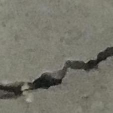

Test Case 2
Prediction by SVM - Not_Crack (724)
Prediction by KNN - Not_Crack (724)


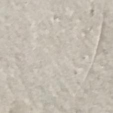

Test Case 3
Prediction by SVM - Crack (312)
Prediction by KNN - Crack (312)


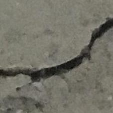

Test Case 4
Prediction by SVM - Not_Crack (725)
Prediction by KNN - Not_Crack (725)


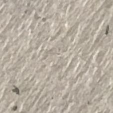

In [21]:
# Extract the image into vector
def image_vector(image, size=(128, 128)):
    return cv2.resize(image, size).flatten()
    

for t in range(1,5):
  img = cv2.imread("case{0}.jpg".format(t))
  pixel = image_vector(img)
  rawImage = numpy.array([pixel])
  prediction1 = model1.predict(rawImage)
  prediction2 = model2.predict(rawImage)
  print("Test Case {0}".format(t))
  print("Prediction by SVM - {0}".format(prediction1[0]))
  print("Prediction by KNN - {0}".format(prediction1[0]))
  w, h = len(img[0]), len(img)
  if w>1000:
    w, h = w//4, h//4
  else:
    w, h = w//2, h//2
  cv2_imshow(cv2.resize(img,(w,h)))